Se tiene un grafo dirigido representado mediante una lista
de adyacencias. Dado un nodo inicial y un nodo final queremos
que programe usando Map-Reduce un algoritmo que indique
cuál es el camino mínimo entre ambos nodos. En clase vimos
como calcular la longitud, ahora queremos saber cuál es el
camino.

In [3]:
adj = [('a',['b']),('b',['c','d','f']),\
      ('c',['e','h','a']),('d',['g']),\
      ('e',['d','k']),('f',['b','d']),('g',['i']),\
      ('h',[]),('i',['d']),('j',['e']),('k',['j'])]

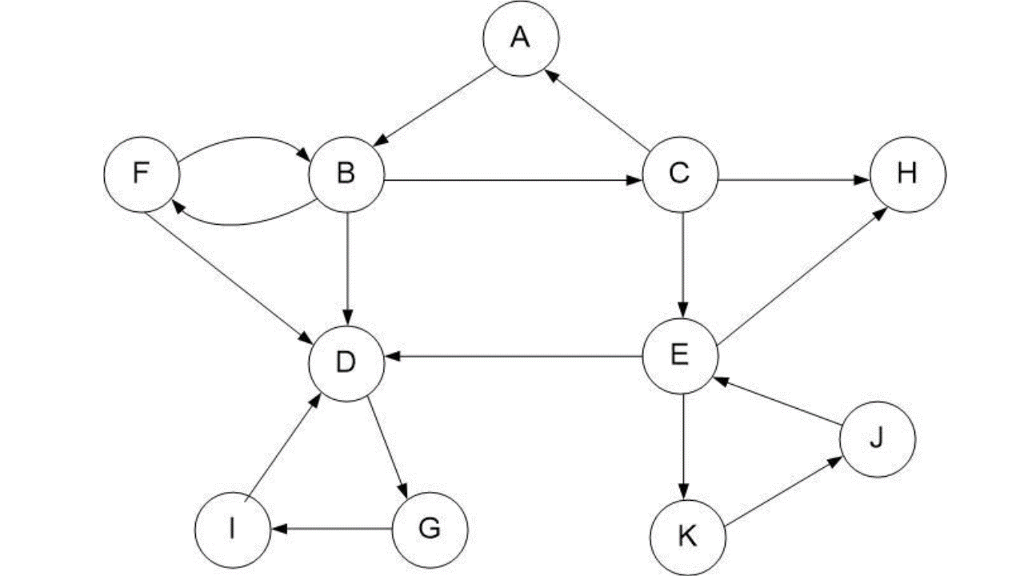
Siendo un grafo dirigido sin pesos, podemos usar BFS para encontrar el camino mas cercano.

In [90]:
def sp(s,e):
    rdd = sc.parallelize(adj)
    #origen, a donde puedo llegar, costo so far, camino so far
    rdd = rdd.map(lambda x: (x[0],x[1],0,[x[0]]))
    
    def map_node(node):
        fafafas = [node]
        for i in node[1]:
            fafafas.append((i,[],node[2]+1,node[3]+[i,]))
        return fafafas

    def reduce_node(node1,node2,start=s):
        print(node1)
        proximos = list(set(node1[0]+node2[0]))
        if node1[2][0]==start and node2[2][0]!=start:
            return (proximos,node1[1],node1[2])
        elif node2[2][0]==start and node1[2][0]!=start:
            return (proximos,node2[1],node2[2])
        elif node1[1] < node2[1]:
            return node1
        else:
            return node2
        
    for _ in range(rdd.count()):
        rdd = rdd.map(map_node).flatMap(lambda x: x).map(lambda x: (x[0],x[1:])).reduceByKey(reduce_node).map(lambda x: (x[0],)+x[1])
    camino = rdd.filter(lambda x: x[0] == e).collect()[0][-1]
    return camino if camino[0]==s and camino[-1]==e else "No hay camino"

Habiendo `V` vertices, si hay un camino de s a e, tendra largo <= `V`. Por eso hacemos `V` iteraciones de `map-reduce`. En la instancia de `map` lo que hacemos es devolver una lista con el nodo que recibi, y los nodos a los que llegue desde ahi. Hago `flatMap` para obtener de nuevo una lista de nodos. El primer elemento de cada tupla es a donde llegue. Hago `reduceByKey` para juntar todas las tuplas en cada nodo. Si ninguno de los nodos recibidos empezo su camino en `s`, devuelvo el de menor costo de llegada. Si alguno empezo en `s`, devuelvo ese.

In [92]:
sp('g','d')

['g', 'i', 'd']

Si tiene pesos, suerte haciendolo :D